In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
data_city = pd.read_csv(city_data_to_load)
data_ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(data_ride, data_city, how='left', on='city')
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

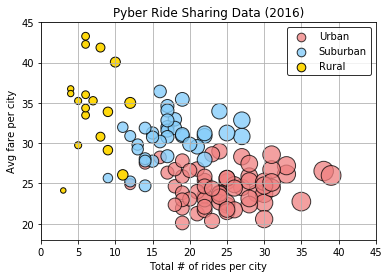

In [21]:
# Obtain the x and y coordinates for each of the three city types
urban = combined_data.loc[combined_data["type"]=="Urban"]
suburban = combined_data.loc[combined_data["type"]=="Suburban"]
rural = combined_data.loc[combined_data["type"]=="Rural"]

# Build the scatter plots for each city types
avg_fare_urban_city = urban.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban_city = suburban.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural_city = rural.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural.groupby(['city'])['driver_count'].value_counts()
# Incorporate the other graph properties

plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.75, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.80, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.95, label="Rural")
plt.xlim(0, 45)
plt.ylim(18,45)
plt.grid()
plt.ylabel("Avg fare per city")
plt.xlabel("Total # of rides per city")
plt.title("Pyber Ride Sharing Data (2016)")

lgnd = plt.legend(frameon = True, edgecolor = 'black', loc='upper right')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

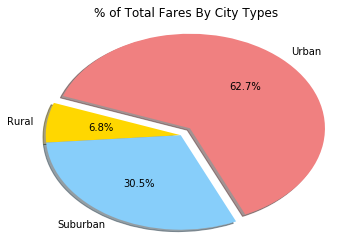

In [17]:
# Calculate Total Fare by City Type
total_fare = combined_data.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.axes().set_aspect(.70)
#plt.savefig("")



In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

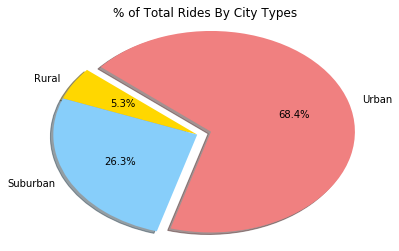

In [18]:
# Calculate Ride Percents
total_rides = combined_data.groupby(['type'])['ride_id'].count()
# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.axes().set_aspect(.70)
labels = ["Rural","Suburban","Urban" ]
# Save Figure
#plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

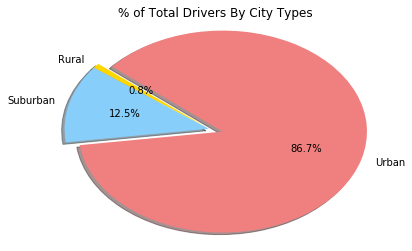

In [19]:
# Calculate Driver Percents
total_drivers = combined_data.groupby(['type'])['driver_count'].sum()
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
# Build Pie Charts
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.axes().set_aspect(.70)
# Save Figure
#plt.savefig("Images/% of Total Drivers By City Types.png")
plt.show()

In [ ]:
# Show Figure
plt.show()